In [14]:

from optimalflow.utilis_func import pipeline_splitting_rule, update_parameters,reset_parameters
reset_parameters()

update_parameters(mode = "cls", estimator_name = "mlp", hidden_layer_sizes = [10],activation=["relu"],learning_rate = ["constant"],solver = ["sgd"])
update_parameters(mode = "cls", estimator_name = "svm", C=[0.1],kernel=["linear"])
update_parameters(mode = "cls", estimator_name = "ada", n_estimators =[50],learning_rate=[1])
update_parameters(mode = "cls", estimator_name = "rf", n_estimators =[50],max_depth=[2])
update_parameters(mode = "cls", estimator_name = "gb", n_estimators =[50],max_depth=[2],learning_rate=[1])
update_parameters(mode = "cls", estimator_name = "xgb", n_estimators =[50],max_depth=[2],learning_rate=[1])

from optimalflow.autoPipe import autoPipe
import pandas as pd
from optimalflow.funcPP import PPtools
from optimalflow.autoPP import dynaPreprocessing

from optimalflow.autoFS import dynaFS_clf
from optimalflow.autoCV import evaluate_model,dynaClassifier,dynaRegressor
df = pd.read_csv('./data/preprocessing/breast_cancer.csv')
custom_parameters = {
    "scaler" : ["None", "standard"],
    # threshold number of category dimension
    "encode_band" : [4],
    # low dimension encoding
    "low_encode" : ["onehot","label"], 
    # high dimension encoding
    "high_encode" : ["frequency", "mean"],
    "winsorizer" : [(0.05,0.05),(0.1,0.1)],
    "sparsity" : [0.4],
    "cols" : [1000]
}

Done with the parameters reset.
Previous Parameters are: {'hidden_layer_sizes': [10, 50, 100], 'activation': ['identity', 'relu', 'tanh', 'logistic'], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'solver': ['lbfgs', 'sgd', 'adam']}
Current Parameters are updated as: {'hidden_layer_sizes': [10], 'activation': ['relu'], 'learning_rate': ['constant'], 'solver': ['sgd']}
Done with the parameters update.
Previous Parameters are: {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10]}
Current Parameters are updated as: {'C': [0.1], 'kernel': ['linear']}
Done with the parameters update.
Previous Parameters are: {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 1, 10, 100]}
Current Parameters are updated as: {'n_estimators': [50], 'learning_rate': [1]}
Done with the parameters update.
Previous Parameters are: {'n_estimators': [5, 50, 250], 'max_depth': [2, 4, 8, 16, 32]}
Current Parameters are updated as: {'n_estimators': [50], 'max_depth': [2]}
Done with the para

In [15]:
pipe = autoPipe(
[("autoPP",dynaPreprocessing(custom_parameters = custom_parameters, label_col = 'diagnosis', model_type = "cls")),
("datasets_splitting",pipeline_splitting_rule(val_size = 0.2, test_size = 0.2, random_state = 13)),
("autoFS",dynaFS_clf(fs_num = 8, random_state=13, cv = 5, in_pipeline = True, input_from_file = False)),
("autoCV",dynaClassifier(random_state = 13,cv_num = 5,in_pipeline = True, input_from_file = False)),
("model_evaluate",evaluate_model(model_type = "cls"))])

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns',None,'display.max_rows',None)
pd.set_option('max_colwidth', -1)

DICT_PREPROCESSING,DICT_FEATURE_SELECTION,DICT_MODELS_EVALUATION,DICT_DATA,dyna_report= pipe.fit(df)

Now in Progress - autoFS & autoCV Iteration: Estimate about 0.0 minutes left  [####################] 100.0%
The top 5 Models with Best Performance Metrics:
          Dataset Model_Name  \
3943  Dataset_563  mlp         
4312  Dataset_616  lgr         
3481  Dataset_497  mlp         
2546  Dataset_363  gb          
1139  Dataset_162  gb          

                                                                                                                      Best_Parameters  \
3943  [('activation', 'relu'), ('hidden_layer_sizes', (10,)), ('learning_rate', 'constant'), ('random_state', 13), ('solver', 'sgd')]   
4312  [('C', 100), ('random_state', 13)]                                                                                                
3481  [('activation', 'relu'), ('hidden_layer_sizes', (10,)), ('learning_rate', 'constant'), ('random_state', 13), ('solver', 'sgd')]   
2546  [('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]             

In [18]:

DICT_MODELS_EVALUATION['Dataset_0']

,Model_Name,Accuracy,Precision,Recall,Latency,Best_Parameters,Dataset
0,lgr,0.895,0.880,0.88,3.0,"[('C', 1000), ('random_state', 13)]",Dataset_0
0,svm,0.912,0.885,0.92,3.0,"[('C', 0.1), ('kernel', 'linear')]",Dataset_0
0,mlp,0.439,0.439,1.00,3.0,"[('activation', 'relu'), ('hidden_layer_sizes', (10,)), ('learning_rate', 'constant'), ('random_state', 13), ('solver', 'sgd')]",Dataset_0
0,rf,0.877,0.821,0.92,12.0,"[('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",Dataset_0
0,ada,0.912,0.955,0.84,17.0,"[('learning_rate', 1), ('n_estimators', 50), ('random_state', 13)]",Dataset_0
0,gb,0.877,0.846,0.88,3.0,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",Dataset_0
0,xgb,0.912,0.955,0.84,2.0,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",Dataset_0


In [19]:
dyna_report.head(15)
dyna_report.to_csv("dyna_report.csv",index=False)

,Dataset,Model_Name,Best_Parameters,Accuracy,Precision,Recall,Latency
3943,Dataset_563,mlp,"[('activation', 'relu'), ('hidden_layer_sizes', (10,)), ('learning_rate', 'constant'), ('random_state', 13), ('solver', 'sgd')]",0.947,0.958,0.92,3.5
4312,Dataset_616,lgr,"[('C', 100), ('random_state', 13)]",0.947,0.923,0.96,3.0
3481,Dataset_497,mlp,"[('activation', 'relu'), ('hidden_layer_sizes', (10,)), ('learning_rate', 'constant'), ('random_state', 13), ('solver', 'sgd')]",0.930,1.000,0.84,3.0
2546,Dataset_363,gb,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",0.930,0.957,0.88,1.0
1139,Dataset_162,gb,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",0.930,0.957,0.88,2.0
3901,Dataset_557,mlp,"[('activation', 'relu'), ('hidden_layer_sizes', (10,)), ('learning_rate', 'constant'), ('random_state', 13), ('solver', 'sgd')]",0.930,0.957,0.88,2.0
1314,Dataset_187,gb,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",0.930,0.957,0.88,3.0
1412,Dataset_201,gb,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",0.930,0.957,0.88,3.0
1678,Dataset_239,gb,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",0.930,0.957,0.88,3.0
1916,Dataset_273,gb,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",0.930,0.957,0.88,3.0


In [15]:
DICT_DATA['Dataset_0']['DICT_TEST']["X"].head(10)

,concavity_mean,concave points_mean,perimeter_mean,radius_mean,texture_mean
264,0.09061,0.065270,111.60,17.19,22.07
231,0.01633,0.006588,71.76,11.32,26.60
197,0.11030,0.057780,117.40,18.08,21.84
172,0.20320,0.109700,102.50,15.46,13.04
54,0.05253,0.033340,97.26,15.10,22.02
33,0.16570,0.075930,127.90,19.27,26.47
68,0.25080,0.043750,60.73,9.72,17.33
237,0.09042,0.060220,132.50,20.48,21.46
51,0.01857,0.017230,87.21,13.64,16.34
196,0.13850,0.065260,90.63,13.77,22.29


In [21]:
test = DICT_PREPROCESSING['Dataset_0']
test

"winsor_0-Scaler_None-- Encoded Features:['diagnosis', 'Size_3', 'area_mean', 'compactness_mean', 'concave points_mean', 'concavity_mean', 'fractal_dimension_mean', 'perimeter_mean', 'radius_mean', 'smoothness_mean', 'symmetry_mean', 'texture_mean', 'Frequency_Age', 'onehot_Position_1_left', 'onehot_Position_1_right', 'Frequency_Position_2', 'Frequency_Size_1', 'Frequency_Size_2', 'onehot_Treatment_no-recurrence-events', 'onehot_Treatment_recurrence-events', 'onehot_Type_1_ge40', 'onehot_Type_1_lt40', 'onehot_Type_1_premeno', 'onehot_Type_2_NaN', 'onehot_Type_2_no', 'onehot_Type_2_yes', 'onehot_Type_3_no', 'onehot_Type_3_yes']"

In [1]:
import pickle
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [37]:
save_obj(DICT_PREPROCESSING,"dict_preprocess")
save_obj(DICT_DATA,"dict_data")
save_obj(DICT_MODELS_EVALUATION,"dict_models_evaluate")
save_obj(dyna_report,"dyna_report")

In [3]:
DICT_PREP = load_obj("dict_preprocess")
dyna_report = load_obj("dyna_report")
DICT_DATA = load_obj("dict_data")
DICT_PREP['Dataset_0']

"winsor_0-Scaler_None-- Encoded Features:['diagnosis', 'Size_3', 'area_mean', 'compactness_mean', 'concave points_mean', 'concavity_mean', 'fractal_dimension_mean', 'perimeter_mean', 'radius_mean', 'smoothness_mean', 'symmetry_mean', 'texture_mean', 'Frequency_Age', 'onehot_Position_1_left', 'onehot_Position_1_right', 'Frequency_Position_2', 'Frequency_Size_1', 'Frequency_Size_2', 'onehot_Treatment_no-recurrence-events', 'onehot_Treatment_recurrence-events', 'onehot_Type_1_ge40', 'onehot_Type_1_lt40', 'onehot_Type_1_premeno', 'onehot_Type_2_NaN', 'onehot_Type_2_no', 'onehot_Type_2_yes', 'onehot_Type_3_no', 'onehot_Type_3_yes']"

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
pd.set_option('display.max_columns',None,'display.max_rows',None)
pd.set_option('max_colwidth', -1)
DICT_DATA['Dataset_0']['DICT_Train']["X"].head(10)
DICT_DATA['Dataset_0']['DICT_Train']["y"].head(10)

,concave points_mean,concavity_mean,radius_mean,area_mean,perimeter_mean,texture_mean,compactness_mean,smoothness_mean
204,0.03821,0.08005,12.470,481.9,81.09,18.60,0.10580,0.09965
198,0.06772,0.11140,19.180,1148.0,127.50,22.49,0.14280,0.08523
93,0.02780,0.03974,13.450,555.1,86.60,18.30,0.08165,0.10220
78,0.12790,0.25080,20.180,1245.0,135.10,23.97,0.22330,0.12150
128,0.08534,0.11380,15.100,674.5,99.58,16.39,0.18070,0.11500
268,0.01615,0.03900,12.870,512.2,82.38,16.21,0.06219,0.09425
273,0.01407,0.01103,9.742,289.9,61.50,15.67,0.04689,0.09037
10,0.03323,0.03299,16.020,797.8,102.70,23.24,0.06669,0.08206
282,0.09464,0.16260,19.400,1145.0,127.20,18.18,0.14420,0.10370
38,0.02899,0.02398,14.990,698.8,95.54,25.20,0.05131,0.09387


204    0
198    1
93     0
78     1
128    0
268    0
273    0
10     1
282    1
38     1
Name: diagnosis, dtype: int32

In [28]:
import joblib
from sklearn.svm import SVC
# mdl = joblib.load('./pkl/_clf_model.pkl')
X_train = DICT_DATA['Dataset_0']['DICT_Train']["X"]
y_train = DICT_DATA['Dataset_0']['DICT_Train']["y"]
X_test = DICT_DATA['Dataset_0']['DICT_TEST']["X"]
y_test = DICT_DATA['Dataset_0']['DICT_TEST']["y"]
mdl = SVC()
mdl.fit(X_train,y_train)
y_true = y_test
y_pred = mdl.predict(X_test)

SVC()

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
print(classification_report(y_true, y_pred))

precision    recall  f1-score   support

           0       0.78      0.93      0.85        27
           1       0.92      0.77      0.84        31

    accuracy                           0.84        58
   macro avg       0.85      0.85      0.84        58
weighted avg       0.86      0.84      0.84        58



SVC()

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

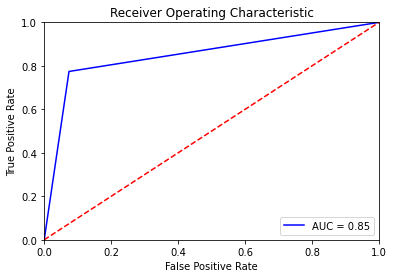

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC
import sklearn.metrics as metrics
# mdl = joblib.load('./pkl/_clf_model.pkl')
X_train = DICT_DATA['Dataset_0']['DICT_Train']["X"]
y_train = DICT_DATA['Dataset_0']['DICT_Train']["y"]
X_test = DICT_DATA['Dataset_0']['DICT_TEST']["X"]
y_test = DICT_DATA['Dataset_0']['DICT_TEST']["y"]
mdl = SVC()
mdl.fit(X_train,y_train)
preds = mdl.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic(ROC Plot)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SVC()

Text(0.5, 1.0, 'Confusion matrix, without normalization')

Confusion matrix, without normalization
[[25  2]
 [ 7 24]]


Text(0.5, 1.0, 'Normalized confusion matrix')

Normalized confusion matrix
[[0.93 0.07]
 [0.23 0.77]]


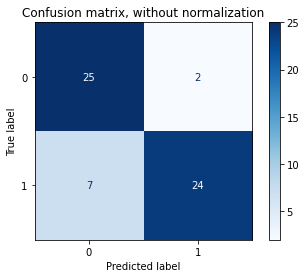

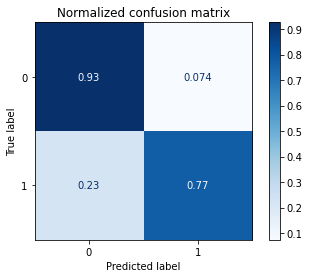

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

X_train = DICT_DATA['Dataset_0']['DICT_Train']["X"]
y_train = DICT_DATA['Dataset_0']['DICT_Train']["y"]
X_test = DICT_DATA['Dataset_0']['DICT_TEST']["X"]
y_test = DICT_DATA['Dataset_0']['DICT_TEST']["y"]
mdl = SVC()
mdl.fit(X_train,y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mdl, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [3]:
from optimalflow.autoViz import autoViz
viz = autoViz(preprocess_dict=DICT_PREP,report=dyna_report)
viz.clf_model_retrieval(metrics='accuracy')

In [23]:
import re
import pandas as pd

columns = ["Dataset","Encode_low_dimension","Encode_high_dimension","Winsorize","Scale"]
df_pp = pd.DataFrame(columns=columns)

for i in list(DICT_PREPROCESSING.keys()):
    row_pp = [i]
    s = DICT_PREPROCESSING[i]
    ext = re.search("Encoded Features:(.*)']", s).group(1)
    
    if ("onehot_" in ext) and ("Frequency_" in ext):
        row_pp.append('Low Dim_Onehot')
        row_pp.append('High Dim_Frequency')
        row_pp.append(re.search('winsor_(.*)-Scaler', s).group(1))
        row_pp.append(re.search('-Scaler_(.*)-- ', s).group(1))
        df_pp.loc[len(df_pp)] = row_pp
    elif ("onehot_" in ext) and ("Mean_" in ext):
        row_pp.append('Low Dim_Onehot')
        row_pp.append('High Dim_Mean')
        row_pp.append(re.search('winsor_(.*)-Scaler', s).group(1))
        row_pp.append(re.search('-Scaler_(.*)-- ', s).group(1))
        df_pp.loc[len(df_pp)] = row_pp
    elif ("onehot_" in ext) and ("Mean_" not in ext) and ("Frequency_" not in ext):
        row_pp.append('Low Dim_Onehot')
        row_pp.append('High Dim_No Encoder')
        row_pp.append(re.search('winsor_(.*)-Scaler', s).group(1))
        row_pp.append(re.search('-Scaler_(.*)-- ', s).group(1))
        df_pp.loc[len(df_pp)] = row_pp
    elif ("Label_" in ext) and ("Frequency_" in ext):
        row_pp.append('Low Dim_Label')
        row_pp.append('High Dim_Frequency')
        row_pp.append(re.search('winsor_(.*)-Scaler', s).group(1))
        row_pp.append(re.search('-Scaler_(.*)-- ', s).group(1))
        df_pp.loc[len(df_pp)] = row_pp
    elif ("Label_" in ext) and ("Mean_" in ext):
        row_pp.append('Low Dim_Label')
        row_pp.append('High Dim_Mean')
        row_pp.append(re.search('winsor_(.*)-Scaler', s).group(1))
        row_pp.append(re.search('-Scaler_(.*)-- ', s).group(1))
        df_pp.loc[len(df_pp)] = row_pp
    elif ("Label_" in ext) and ("Mean_" not in ext) and ("Frequency_" not in ext):
        row_pp.append('Low Dim_Label')
        row_pp.append('High Dim_No Encoder')
        row_pp.append(re.search('winsor_(.*)-Scaler', s).group(1))
        row_pp.append(re.search('-Scaler_(.*)-- ', s).group(1))
        df_pp.loc[len(df_pp)] = row_pp
    elif ("Frequency_" in ext) and ("onehot_" not in ext) and ("Label_" not in ext):
        row_pp.append('Low Dim_No Encoder')
        row_pp.append('High Dim_Frequency')
        row_pp.append(re.search('winsor_(.*)-Scaler', s).group(1))
        row_pp.append(re.search('-Scaler_(.*)-- ', s).group(1))
        df_pp.loc[len(df_pp)] = row_pp    
    elif ("Mean_" in ext) and ("onehot_" not in ext) and ("Label_" not in ext):
        row_pp.append('Low Dim_No Encoder')
        row_pp.append('High Dim_Mean')
        row_pp.append(re.search('winsor_(.*)-Scaler', s).group(1))
        row_pp.append(re.search('-Scaler_(.*)-- ', s).group(1))
        df_pp.loc[len(df_pp)] = row_pp    
    elif ("Frequency_" not in ext) and ("Mean_" not in ext) and ("onehot_" not in ext) and ("Label_" not in ext):
        row_pp.append('Low Dim_No Encoder')
        row_pp.append('High Dim_No Encoder')
        row_pp.append(re.search('winsor_(.*)-Scaler', s).group(1))
        row_pp.append(re.search('-Scaler_(.*)-- ', s).group(1))
        df_pp.loc[len(df_pp)] = row_pp    


df_report_Accuracy = df_pp.merge(dyna_report[['Dataset','Accuracy']], how = 'left', on = 'Dataset')
bins = [0, 0.70, 0.90, 1]
labels = ["Low Accuracy","High Accuracy","Top Accuracy"]
df_report_Accuracy['Level'] = pd.cut(df_report_Accuracy['Accuracy'], bins=bins, labels=labels)
df_report_Accuracy['cnt'] = 1
df_report_Accuracy.loc[df_report_Accuracy['Scale'] == 'None','Scale'] = "No Scaler"
df_report_Accuracy['Scale'] = 'Scale_'+df_report_Accuracy['Scale']
df_report_Accuracy['Winsorize'] = 'Winsorize_' + df_report_Accuracy['Winsorize']
df_report_Accuracy.head(3)

df_report_Precision = df_pp.merge(dyna_report[['Dataset','Precision']], how = 'left', on = 'Dataset')
bins = [0, 0.70, 0.90, 1]
labels = ["Low Precision","High Precision","Top Precision"]
df_report_Precision['Level'] = pd.cut(df_report_Precision['Precision'], bins=bins, labels=labels)
df_report_Precision['cnt'] = 1
df_report_Precision.loc[df_report_Precision['Scale'] == 'None','Scale'] = "No Scaler"
df_report_Precision['Scale'] = 'Scale_'+df_report_Accuracy['Scale']
df_report_Precision['Winsorize'] = 'Winsorize_' + df_report_Precision['Winsorize']
df_report_Precision.head(3)

df_report_Recall = df_pp.merge(dyna_report[['Dataset','Recall']], how = 'left', on = 'Dataset')
bins = [0, 0.70, 0.90, 1]
labels = ["Low Recall","High Recall","Top Recall"]
df_report_Recall['Level'] = pd.cut(df_report_Recall['Recall'], bins=bins, labels=labels)
df_report_Recall['cnt'] = 1
df_report_Recall.loc[df_report_Recall['Scale'] == 'None','Scale'] = "No Scaler"
df_report_Recall['Scale'] = 'Scale_'+df_report_Accuracy['Scale']
df_report_Recall['Winsorize'] = 'Winsorize_' + df_report_Recall['Winsorize']
df_report_Recall.head(3)


,Dataset,Encode_low_dimension,Encode_high_dimension,Winsorize,Scale,Accuracy,Level,cnt
0,Dataset_0,Low Dim_Onehot,High Dim_Frequency,Winsorize_0,Scale_No Scaler,0.912,Top Accuracy,1
1,Dataset_0,Low Dim_Onehot,High Dim_Frequency,Winsorize_0,Scale_No Scaler,0.912,Top Accuracy,1
2,Dataset_0,Low Dim_Onehot,High Dim_Frequency,Winsorize_0,Scale_No Scaler,0.912,Top Accuracy,1


,Dataset,Encode_low_dimension,Encode_high_dimension,Winsorize,Scale,Precision,Level,cnt
0,Dataset_0,Low Dim_Onehot,High Dim_Frequency,Winsorize_0,Scale_Scale_No Scaler,0.955,Top Precision,1
1,Dataset_0,Low Dim_Onehot,High Dim_Frequency,Winsorize_0,Scale_Scale_No Scaler,0.955,Top Precision,1
2,Dataset_0,Low Dim_Onehot,High Dim_Frequency,Winsorize_0,Scale_Scale_No Scaler,0.885,High Precision,1


,Dataset,Encode_low_dimension,Encode_high_dimension,Winsorize,Scale,Recall,Level,cnt
0,Dataset_0,Low Dim_Onehot,High Dim_Frequency,Winsorize_0,Scale_Scale_No Scaler,0.84,High Recall,1
1,Dataset_0,Low Dim_Onehot,High Dim_Frequency,Winsorize_0,Scale_Scale_No Scaler,0.84,High Recall,1
2,Dataset_0,Low Dim_Onehot,High Dim_Frequency,Winsorize_0,Scale_Scale_No Scaler,0.92,Top Recall,1


In [24]:
step1_df = df_report_Accuracy.groupby(['Encode_low_dimension','Dataset'], as_index=False)['cnt'].count().rename({"cnt":"Total","Dataset":"antecedentIndex","Encode_low_dimension":"consequentIndex"},axis = 1)[['antecedentIndex','consequentIndex','Total']]
step2_df = df_report_Accuracy.groupby(['Encode_low_dimension','Encode_high_dimension'], as_index=False)['cnt'].count().rename({"cnt":"Total","Encode_low_dimension":"antecedentIndex","Encode_high_dimension":"consequentIndex"},axis = 1)[['antecedentIndex','consequentIndex','Total']]
step3_df = df_report_Accuracy.groupby(['Encode_high_dimension','Winsorize'], as_index=False)['cnt'].count().rename({"cnt":"Total","Encode_high_dimension":"antecedentIndex","Winsorize":"consequentIndex"},axis = 1)[['antecedentIndex','consequentIndex','Total']]
step4_df = df_report_Accuracy.groupby(['Winsorize','Scale'], as_index=False)['cnt'].count().rename({"cnt":"Total","Winsorize":"antecedentIndex","Scale":"consequentIndex"},axis = 1)[['antecedentIndex','consequentIndex','Total']]
step5_df = df_report_Accuracy.groupby(['Scale','Level'], as_index=False)['cnt'].count().rename({"cnt":"Total","Scale":"antecedentIndex","Level":"consequentIndex"},axis = 1)[['antecedentIndex','consequentIndex','Total']].dropna()
integrated_df = pd.concat([step1_df,step2_df,step3_df,step4_df,step5_df],axis = 0)
integrated_df.head(10)

,antecedentIndex,consequentIndex,Total
0,Dataset_0,Low Dim_Onehot,7.0
1,Dataset_1,Low Dim_Onehot,7.0
2,Dataset_10,Low Dim_Onehot,7.0
3,Dataset_100,Low Dim_Onehot,7.0
4,Dataset_101,Low Dim_Onehot,7.0
5,Dataset_102,Low Dim_Onehot,7.0
6,Dataset_103,Low Dim_Onehot,7.0
7,Dataset_104,Low Dim_Onehot,7.0
8,Dataset_105,Low Dim_Onehot,7.0
9,Dataset_106,Low Dim_Onehot,7.0


In [25]:
label_df = pd.DataFrame(integrated_df['antecedentIndex'].append(integrated_df['consequentIndex']).drop_duplicates(),columns = {"label"})
label_df['Number'] = label_df.reset_index().index
label_list = list(label_df.label)



source_df = pd.DataFrame(integrated_df['antecedentIndex'])
source_df = source_df.merge(label_df, left_on=['antecedentIndex'], right_on = ['label'],how = 'left')
source_list = list(source_df['Number'])


target_df = pd.DataFrame(integrated_df['consequentIndex'])
target_df = target_df.merge(label_df, left_on=['consequentIndex'], right_on = ['label'],how = 'left')
target_list = list(target_df['Number'])

value_list = [int(i) for i in list(integrated_df.Total)]


In [26]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 10,
      line = dict(color = 'rgb(25,100,90)', width = 0.5),
      label = label_list,
      color = 'rgb(71,172,55)'
    ),
    link = dict(
      source = source_list, 
      target = target_list,
      value = value_list
  ))])

fig.update_layout(title = 'Pipeline Cluster Traversal Experiments - autoViz Model Retrieval Diagram <a href="https://www.linkedin.com/in/lei-tony-dong/"> ©Tony Dong</a>', font_size=8)
from plotly.offline import plot
plot(fig)


'temp-plot.html'

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
a = {'learning_rate': 1, 'max_depth': 2, 'n_estimators': 50, 'random_state': 13}
lis = a.items()
[i for i in lis]

[('learning_rate', 1),
 ('max_depth', 2),
 ('n_estimators', 50),
 ('random_state', 13)]

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 2